In [3]:
# load and check data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

params = pd.read_csv('step1_experiment_metaparams.csv')
data = pd.read_csv('step1_experiment_data.csv')

# check data length and schema
print(params.shape)
print(data.shape)
print(params.columns)
print(data.columns)

(243, 17)
(243, 10)
Index(['replacement_policy', 'prefetcher_type', 'l1_cache_sample_seed',
       'l2_cache_sample_seed', 'l3_cache_sample_seed', 'big_core_width',
       'big_core_rob_size', 'big_core_num_int_regs', 'big_core_num_fp_regs',
       'small_core_width', 'small_core_rob_size', 'small_core_num_int_regs',
       'small_core_num_fp_regs', 'big_core_num', 'small_core_num', 'matsize',
       'experiment_index'],
      dtype='object')
Index(['experiment_index', 'simSeconds', 'simInsts', 'avg_big_l1i_missrate',
       'avg_big_l1d_missrate', 'avg_big_l2_missrate',
       'avg_little_l1i_missrate', 'avg_little_l1d_missrate',
       'avg_little_l2_missrate', 'avg_l3_missrate'],
      dtype='object')


In [4]:
# merge data and params
df = pd.merge(data, params, on='experiment_index')

# save merged data
df.to_csv('step1_experiment_merged.csv', index=False)

(array([130.,  36.,  14.,   7.,   7.,  19.,   2.,   2.,   5.,   4.,   4.,
          3.,   2.,   1.,   2.,   1.,   1.,   1.,   0.,   2.]),
 array([0.001176  , 0.00275355, 0.0043311 , 0.00590865, 0.0074862 ,
        0.00906375, 0.0106413 , 0.01221885, 0.0137964 , 0.01537395,
        0.0169515 , 0.01852905, 0.0201066 , 0.02168415, 0.0232617 ,
        0.02483925, 0.0264168 , 0.02799435, 0.0295719 , 0.03114945,
        0.032727  ]),
 <BarContainer object of 20 artists>)

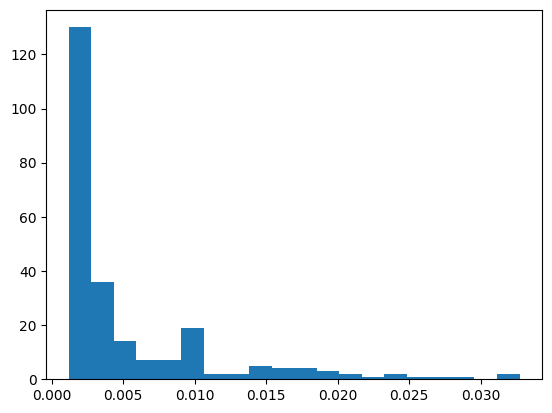

In [5]:
# analysis 1: check the distribution of the simSeconds
plt.hist(df['simSeconds'], bins="auto")

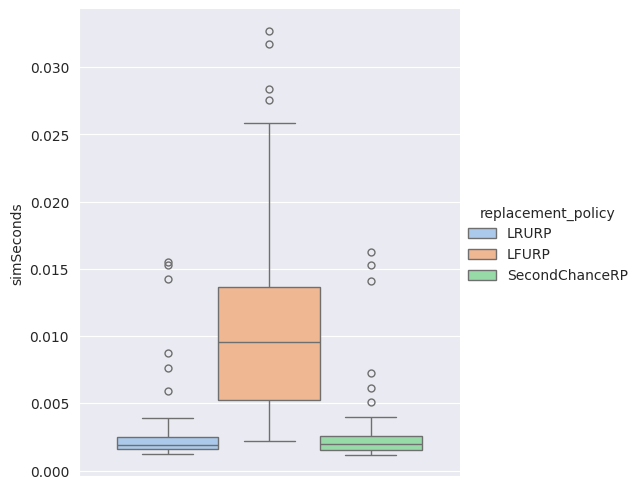

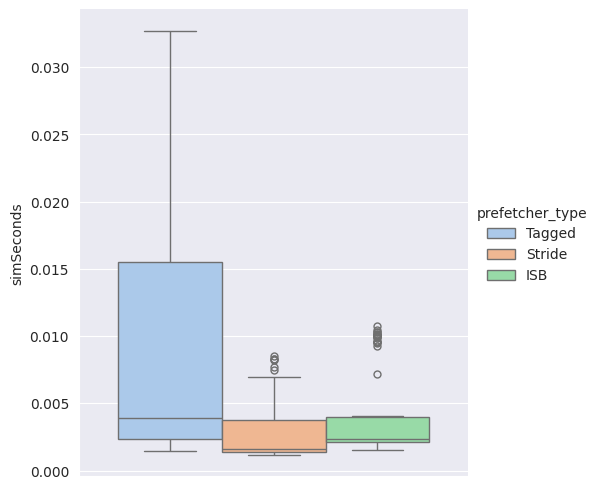

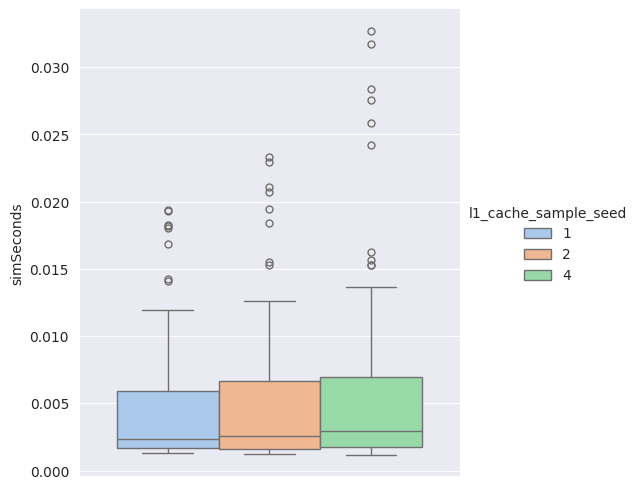

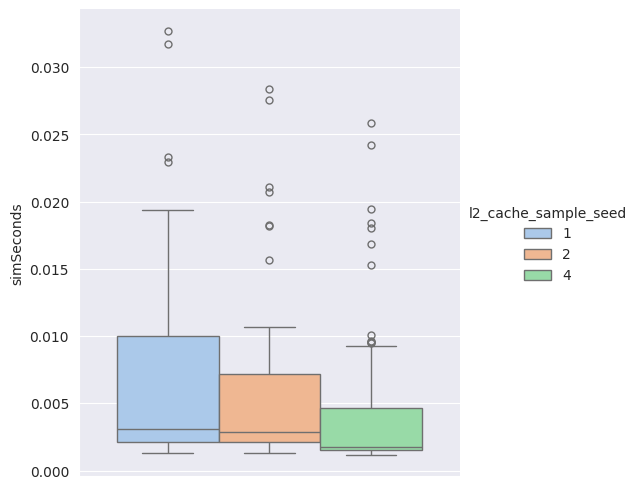

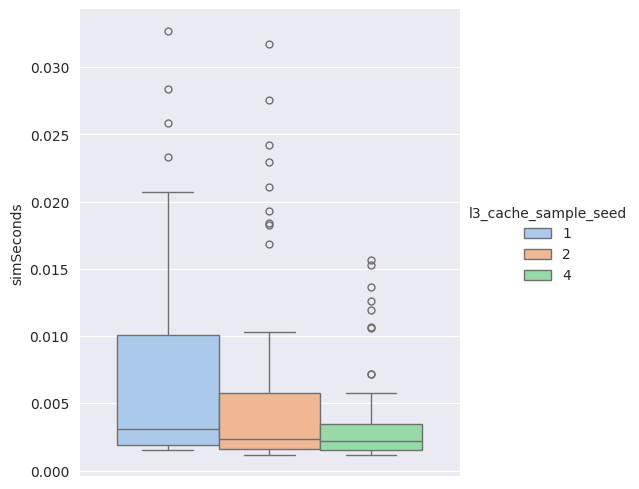

In [13]:
# analysis 2: check the impact of each parameter on simSeconds
columns_of_interest = ['simSeconds','replacement_policy','prefetcher_type','l1_cache_sample_seed','l2_cache_sample_seed','l3_cache_sample_seed']

analysis_2_df = df[columns_of_interest]

params = ['replacement_policy','prefetcher_type','l1_cache_sample_seed','l2_cache_sample_seed','l3_cache_sample_seed']
sns.set_style("darkgrid")
for param in params:
    # set the width of each box
    sns.catplot(hue=param, y="simSeconds", data=analysis_2_df, kind="box", palette="pastel", width=0.8, dodge=True)
    # save the plot as svg
    plt.savefig(f'{param}_simSeconds.svg')
    plt.show()

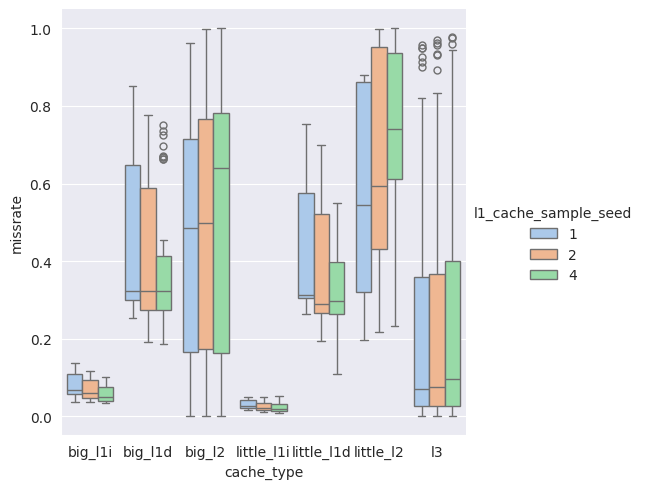

In [19]:
# analysis 3: check cache hit rate against l1_cache_sample_seed
columns_of_interest = ['l1_cache_sample_seed','avg_big_l1i_missrate',
       'avg_big_l1d_missrate', 'avg_big_l2_missrate',
       'avg_little_l1i_missrate', 'avg_little_l1d_missrate',
       'avg_little_l2_missrate', 'avg_l3_missrate']

analysis3_df = df[columns_of_interest]

# rename the columns
analysis3_df.columns = ['l1_cache_sample_seed','big_l1i','big_l1d','big_l2','little_l1i','little_l1d','little_l2','l3']

# reorganize the data into ['l1_cache_sample_seed','cache_type','missrate']
analysis3_df = analysis3_df.melt(id_vars=['l1_cache_sample_seed'], var_name='cache_type', value_name='missrate')

# plot the data
sns.set_style("darkgrid")
sns.catplot(x='cache_type', y='missrate', hue='l1_cache_sample_seed', data=analysis3_df, kind='box', palette='pastel', width=0.8, dodge=True)
plt.savefig('cache_hit_rate.svg')
plt.show()